# Análise Exploratória - Acidentes de trânsito no Brasil

<p> Utilizando dados oficiais da policia rodoviaría federal, vamos analisar os dados de acidentes de trânsito no Brasil. </p>

In [77]:
# Instalando bibliotecas
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [78]:
# Importando bibliotecas
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('acidents_prf_2023.csv', sep=';', encoding='iso-8859-1',  on_bad_lines='skip', quoting=csv.QUOTE_NONE)
# Remove "" aspas duplas redundantes do arquivo
df.columns = df.columns.str.replace('"', '')
df.columns = df.columns.str.lower()
columns_to_drop = ['pesid', 'ano_fabricacao_veiculo', 'marca']
df = df.drop(columns=columns_to_drop)
df.tail

<bound method NDFrame.tail of             id data_inversa      dia_semana     horario    uf     br     km  \
0       496506   2023-01-01       "domingo"  "00:15:00"  "MG"  116.0    587   
1       496506   2023-01-01       "domingo"  "00:15:00"  "MG"  116.0    587   
2       496506   2023-01-01       "domingo"  "00:15:00"  "MG"  116.0    587   
3       496506   2023-01-01       "domingo"  "00:15:00"  "MG"  116.0    587   
4       496507   2023-01-01       "domingo"  "00:20:00"  "MG"  381.0  686,5   
...        ...          ...             ...         ...   ...    ...    ...   
135385  515057   2023-04-05  "quarta-feira"  "22:00:00"  "MG"  262.0    430   
135386  515057   2023-04-05  "quarta-feira"  "22:00:00"  "MG"  262.0    430   
135387  515057   2023-04-05  "quarta-feira"  "22:00:00"  "MG"  262.0    430   
135388  515057   2023-04-05  "quarta-feira"  "22:00:00"  "MG"  262.0    430   
135389  515057   2023-04-05  "quarta-feira"  "22:00:00"  "MG"  262.0    430   

                    m

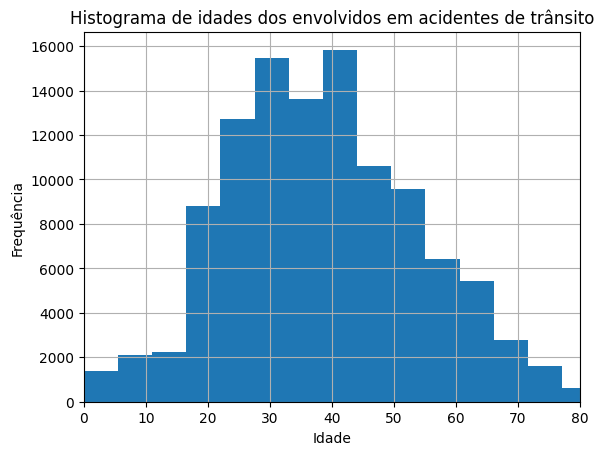

In [ ]:

num_bins = int(math.sqrt(len(df['idade'])))
df['idade'].hist(bins=num_bins)
plt.title('Histograma de idades dos envolvidos em acidentes de trânsito')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xlim([0, 80])
plt.show()

In [93]:
df['idade'] = pd.to_numeric(df['idade'], errors='coerce')
df.groupby(['municipio']).mean()['idade']

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
site = 'https://github.com/kelvins/Municipios-Brasileiros/blob/main/csv/municipios.csv?raw=true'

coordenadas = pd.read_csv(site)

(df['idade'])
concatenado_idade = pd.merge(df['Idade'], coordenadas, how = 'left', left_on=['Cidade'], right_on = ['nome'])
concatenado_idade.plot.scatter(y='latitude', x = 'longitude', 
                         c = concatenado_idade['NU_IDADE'],
                         cmap = 'PiYG',
                         figsize = (12,10)).set_title('Média de Idade ENEM 2019 por Município', fontsize = 16)
ax = plt.gca()
ax.set_facecolor('linen')
plt.show();

KeyError: 'Idade'